# Load model's train/val/test preds and labels

In [1]:
model = "regressionJun24Positives"

trainPredictions = open('../predictions/' + model + '/trainPredictions.txt')
validPredictions = open('../predictions/' + model + '/validPredictions.txt')
testPredictions = open('../predictions/' + model + '/testPredictions.txt')

trainPreds = {'avg': [], 'rep1': [], 'rep2': []}
validPreds = {'avg': [], 'rep1': [], 'rep2': []}
testPreds = {'avg': [], 'rep1': [], 'rep2': []}

for line in trainPredictions:
    line = line.strip().split('\t')
    trainPreds['avg'].append(float(line[0]))
    trainPreds['rep1'].append(float(line[1]))
    trainPreds['rep2'].append(float(line[2]))
    
for line in validPredictions:
    line = line.strip().split('\t')
    validPreds['avg'].append(float(line[0]))
    validPreds['rep1'].append(float(line[1]))
    validPreds['rep2'].append(float(line[2]))
    
for line in testPredictions:
    line = line.strip().split('\t')
    testPreds['avg'].append(float(line[0]))
    testPreds['rep1'].append(float(line[1]))
    testPreds['rep2'].append(float(line[2]))

In [2]:
import h5py

model = "regressionJun24Positives"
trainHdf5 = h5py.File('../hdf5files/' + model + '/train_data.hdf5')
validHdf5 = h5py.File('../hdf5files/' + model + '/valid_data.hdf5')
testHdf5 = h5py.File('../hdf5files/' + model + '/test_data.hdf5')

trainLabels = {'avg': [], 'rep1': [], 'rep2': []}
validLabels = {'avg': [], 'rep1': [], 'rep2': []}
testLabels = {'avg': [], 'rep1': [], 'rep2': []}

for label in trainHdf5['Y']['output']:
    trainLabels['avg'].append(label[0])
    trainLabels['rep1'].append(label[1])
    trainLabels['rep2'].append(label[2])
    
for label in validHdf5['Y']['output']:
    validLabels['avg'].append(label[0])
    validLabels['rep1'].append(label[1])
    validLabels['rep2'].append(label[2])

for label in testHdf5['Y']['output']:
    testLabels['avg'].append(label[0])
    testLabels['rep1'].append(label[1])
    testLabels['rep2'].append(label[2])

In [3]:
import numpy as np
for predDict in [trainPreds, validPreds, testPreds, trainLabels, validLabels, testLabels]:
    predDict['avg'] = np.array(predDict['avg'])
    predDict['rep1'] = np.array(predDict['rep1'])
    predDict['rep2'] = np.array(predDict['rep2'])

In [4]:
from scipy.stats import pearsonr, spearmanr
print "Avg signal predictions Pearson = " + str(pearsonr(validPreds['avg'], validLabels['avg']))
print "Avg signal predictions Spearman = " + str(spearmanr(validPreds['avg'], validLabels['avg']))
print "Rep1 signal predictions Pearson = " + str(pearsonr(validPreds['rep1'], validLabels['rep1']))
print "Rep1 signal predictions Spearman = " + str(spearmanr(validPreds['rep1'], validLabels['rep1']))
print "Rep2 signal predictions Pearson = " + str(pearsonr(validPreds['rep2'], validLabels['rep2']))
print "Rep2 signal predictions Spearman = " + str(spearmanr(validPreds['rep2'], validLabels['rep2']))

Avg signal predictions Pearson = (0.4677818843096434, 0.0)
Avg signal predictions Spearman = SpearmanrResult(correlation=0.25624987864424664, pvalue=0.0)
Rep1 signal predictions Pearson = (0.26296772481339797, 0.0)
Rep1 signal predictions Spearman = SpearmanrResult(correlation=0.12609152474023425, pvalue=1.1087577156479985e-182)
Rep2 signal predictions Pearson = (0.49138425600425301, 0.0)
Rep2 signal predictions Spearman = SpearmanrResult(correlation=0.30069391088278913, pvalue=0.0)


# Plot labels vs. predictions

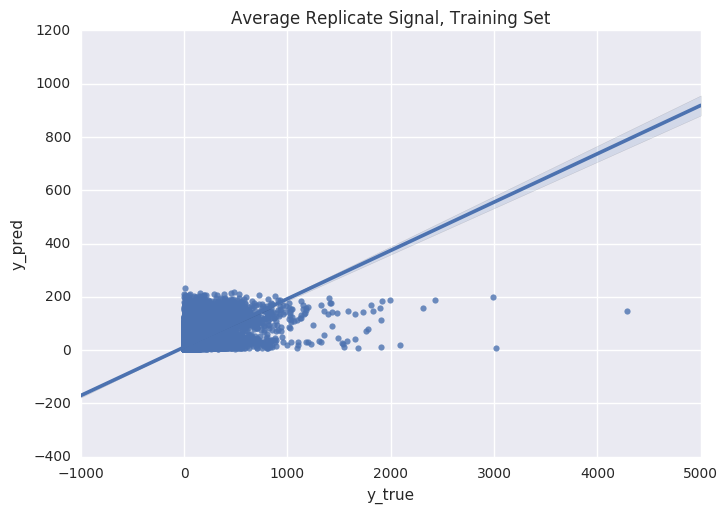

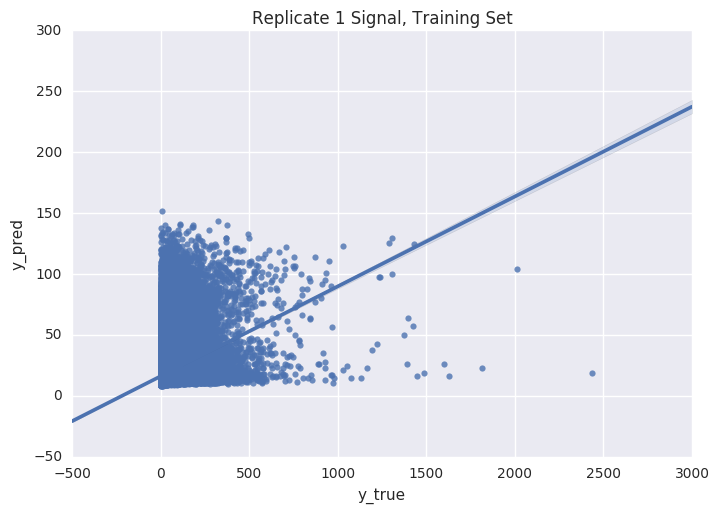

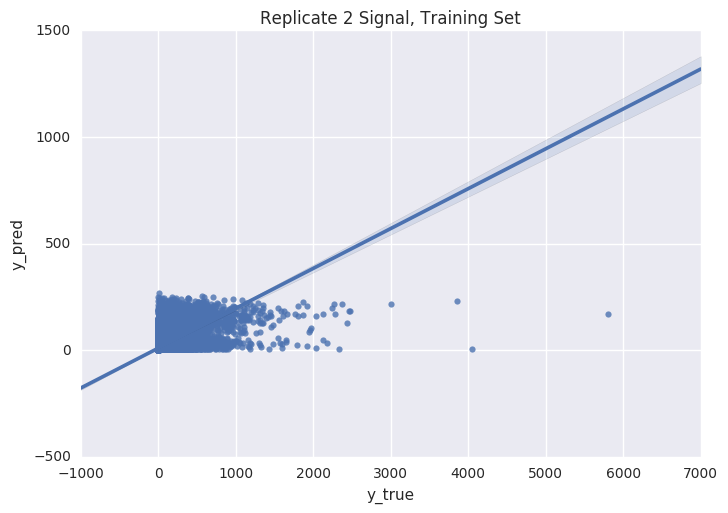

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.subplot(111);
plt.figure();
plt.title('Average Replicate Signal, Training Set');
g = sns.regplot(trainLabels['avg'], trainPreds['avg']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(122);
plt.figure();
plt.title('Replicate 1 Signal, Training Set');
g = sns.regplot(trainLabels['rep1'], trainPreds['rep1']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(133);
plt.figure();
plt.title('Replicate 2 Signal, Training Set');
g = sns.regplot(trainLabels['rep2'], trainPreds['rep2']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(214);
# plt.title('Average Replicate Signal, Validation Set');
# g = sns.regplot(validLabels['avg'], validPreds['avg']);
# g.set(xlabel='y_true', ylabel='y_pred');
# g.set_xlim(0, 250);


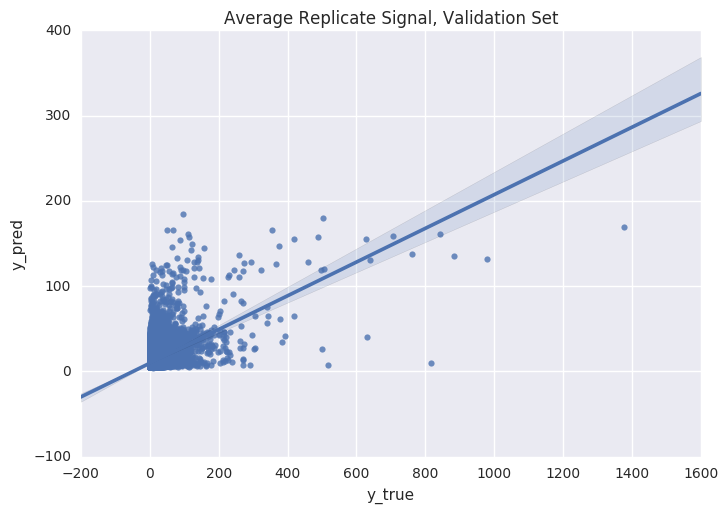

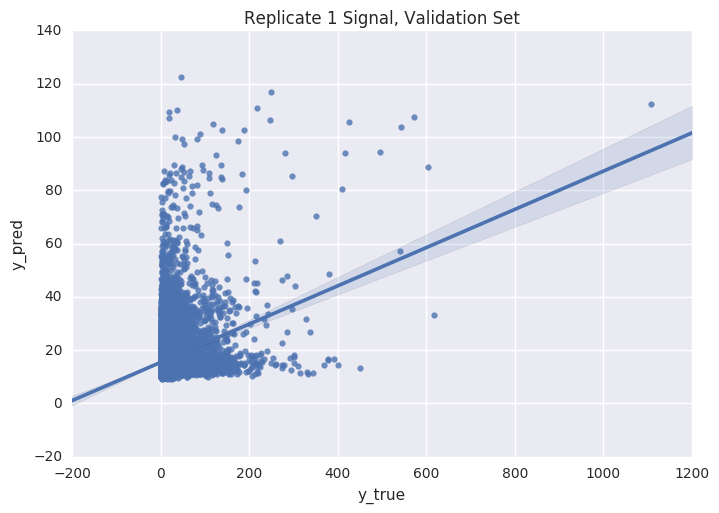

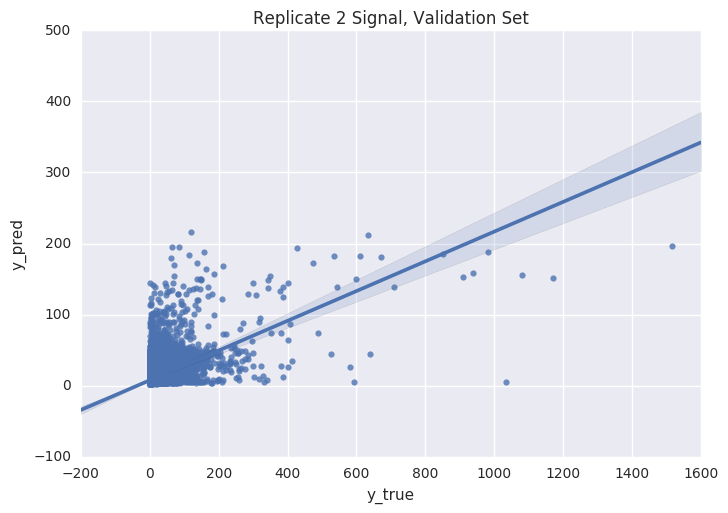

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.subplot(111);
plt.figure();
plt.title('Average Replicate Signal, Validation Set');
g = sns.regplot(validLabels['avg'], validPreds['avg']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(122);
plt.figure();
plt.title('Replicate 1 Signal, Validation Set');
g = sns.regplot(validLabels['rep1'], validPreds['rep1']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(133);
plt.figure();
plt.title('Replicate 2 Signal, Validation Set');
g = sns.regplot(validLabels['rep2'], validPreds['rep2']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

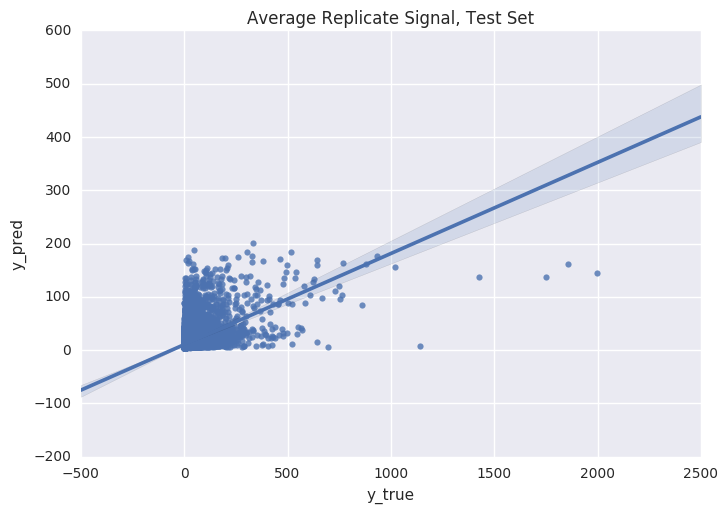

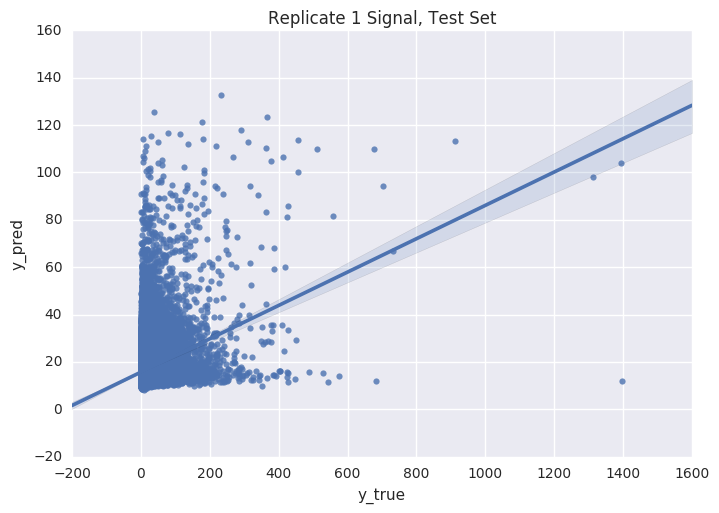

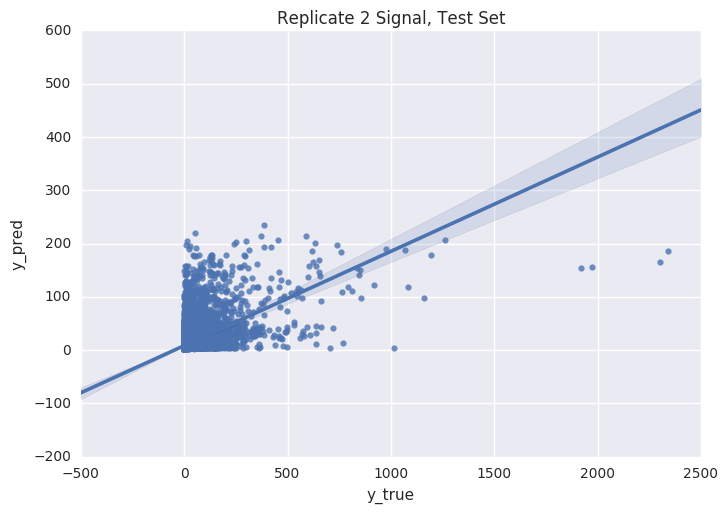

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.subplot(111);
plt.figure();
plt.title('Average Replicate Signal, Test Set');
g = sns.regplot(testLabels['avg'], testPreds['avg']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(122);
plt.figure();
plt.title('Replicate 1 Signal, Test Set');
g = sns.regplot(testLabels['rep1'], testPreds['rep1']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(133);
plt.figure();
plt.title('Replicate 2 Signal, Test Set');
g = sns.regplot(testLabels['rep2'], testPreds['rep2']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# Evaluate performance at TSS regions

In [18]:
import gzip

gencodeFilePath = "../../data/GENCODE/gencodeTSS/v19/TSS_human_strict_with_gencodetss_notlow_ext50eachside_merged_withgenctsscoord_andgnlist.gff.gz"
tssFile = gzip.open(gencodeFilePath)

gencCageTss = []
for line in tssFile:
    line = line.strip().split('\t')
    annot = line[8].strip().split(' ')
    if annot[1] == "GencCAGE" or annot[1] == "GencOnly" or annot[1] == "CAGEOnly":
        gencCageTss.append(line)

print len(gencCageTss)

247680


In [39]:
chr8Tss = []
for tss in gencCageTss:
    if tss[0] == 'chr8':
        chr8Tss.append(tss)

In [44]:
print len(chr8Tss)
for i in range(len(chr8Tss)):
    chr8Tss[i][3] = int(chr8Tss[i][3])
    chr8Tss[i][4] = int(chr8Tss[i][4])

print chr8Tss[:10]

9919
[['chr8', 'rikcrg', 'tss', 14270, 14370, '.', '-', '.', 'class: GencOnly list_genctssclus: chr8_14270_14370_-, list_genctssclus: ENSG00000253620.2,'], ['chr8', 'rikcrg', 'tss', 22551, 22667, '.', '+', '.', 'class: GencOnly list_genctssclus: chr8_22551_22651_+,chr8_22567_22667_+, list_genctssclus: ENSG00000253896.3,'], ['chr8', 'rikcrg', 'tss', 100678, 100778, '.', '-', '.', 'class: GencOnly list_genctssclus: chr8_100678_100778_-, list_genctssclus: ENSG00000254193.1,'], ['chr8', 'rikcrg', 'tss', 105224, 105324, '.', '+', '.', 'class: GencOnly list_genctssclus: chr8_105224_105324_+, list_genctssclus: ENSG00000253612.1,'], ['chr8', 'rikcrg', 'tss', 116993, 117093, '.', '-', '.', 'class: GencOnly list_genctssclus: chr8_116993_117093_-, list_genctssclus: ENSG00000176269.3,'], ['chr8', 'rikcrg', 'tss', 150512, 150613, '.', '-', '.', 'class: GencOnly list_genctssclus: chr8_150512_150612_-,chr8_150513_150613_-, list_genctssclus: ENSG00000250210.3,ENSG00000255464.1,'], ['chr8', 'rikcrg', '

In [46]:
import gzip

testRegionsFile = gzip.open('../splits/regressionJun24Positives/testJun24RegressionPositives.txt.gz')
testRegions = []
i = 0
for line in testRegionsFile:
    line = line.strip()
    chrom, coords = line.split(':')
    if coords.rfind('-') == coords.find('-'):
        start, end = coords.split('-')
        strand = end.split('(')[1][0]
        end = end[:end.find('(')]
    else:
        start, end = coords.split('-')[:2]
        end = end[:-1]
        strand = line.split('(')[1][0]
    testRegions.append([chrom, int(start), int(end), strand])
    if i < 5:
        print chrom, start, end, strand
    i += 1
    

chr8 19275 20358 +
chr8 25462 26395 +
chr8 28827 29718 +
chr8 29095 30084 -
chr8 29302 29804 +


In [41]:
print len(testRegions)
print testRegions[:4]

102992
[['chr8', '19275', '20358', '+'], ['chr8', '25462', '26395', '+'], ['chr8', '28827', '29718', '+'], ['chr8', '29095', '30084', '-']]


In [49]:
minDistance = 1000

tssProximalRegionIndices = []
i = 0
for i in range(len(testRegions)):
    if i % 5e3 == 0:
        print i
    fragment = testRegions[i]
    fragmentStart = fragment[1]
    fragmentEnd = fragment[2]
    for j in range(len(chr8Tss)):
        tss = chr8Tss[j]
        tssStart = tss[3]
        tssEnd = tss[4]
        
        # compare chromosomes; if TSS is past it, break, else keep looking
        if int(tss[0].split('chr')[1]) > int(fragment[0].split('chr')[1]):
            break
        elif int(tss[0].split('chr')[1]) < int(fragment[0].split('chr')[1]):
            continue
        
        # compare genomic coordinates
        if tssStart > fragmentEnd + minDistance:
            break
        elif tssEnd + minDistance < fragmentStart:
            continue
        else:
            tssProximalRegionIndices.append((i, j))
            break
    
    i += 1
    

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


In [51]:
print len(tssProximalRegionIndices)

16166


In [52]:
tssProximalRegions = np.array([i for (i,j) in tssProximalRegionIndices])

In [58]:
# Data quality near TSSs
print spearmanr(testLabels['rep1'], testLabels['rep2'])
print spearmanr(testLabels['rep1'][tssProximalRegions], testLabels['rep2'][tssProximalRegions])

# Prediction scores near TSSs
print spearmanr(testPreds['avg'], testLabels['avg'])
print spearmanr(testPreds['avg'][tssProximalRegions], testLabels['avg'][tssProximalRegions])
print spearmanr(testPreds['rep1'], testLabels['rep1'])
print spearmanr(testPreds['rep1'][tssProximalRegions], testLabels['rep1'][tssProximalRegions])
print spearmanr(testPreds['rep2'], testLabels['rep2'])
print spearmanr(testPreds['rep2'][tssProximalRegions], testLabels['rep2'][tssProximalRegions])

SpearmanrResult(correlation=0.3185754674878522, pvalue=0.0)
SpearmanrResult(correlation=0.48875877010950841, pvalue=0.0)
SpearmanrResult(correlation=0.28695702762137176, pvalue=0.0)
SpearmanrResult(correlation=0.49655980060684196, pvalue=0.0)
SpearmanrResult(correlation=0.1438362966323318, pvalue=0.0)
SpearmanrResult(correlation=0.28116103290917727, pvalue=1.9876863632609385e-291)
SpearmanrResult(correlation=0.3314988537585678, pvalue=0.0)
SpearmanrResult(correlation=0.54473754779794659, pvalue=0.0)
